In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'0': 524, '1': 500}


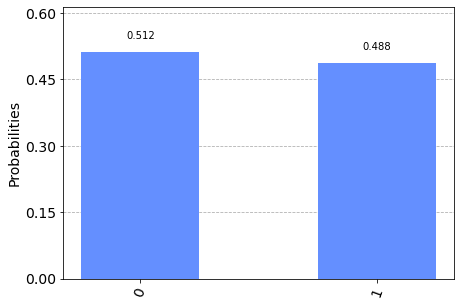

In [2]:
x = QuantumRegister(2)
y = QuantumRegister(3)
c = ClassicalRegister(1, "c")
qc = QuantumCircuit(x, y, c, name="truth_table2")

# x1x2  y = ~x0*~x1 + ~x0*x1 + x0*~x1 + x0*x1
# 00 1
# 01 1
# 10 1 
# 11 1 

# phi1 = |00>|0> + |01>|0> + |10>|0> + |11>|0>
# phin = |00>|0> + |01>|0> + |10>|1> + |11>|1>

# x
qc.h(x[0]) 
qc.h(x[1])

# x0*~x1 -> y[0] = x[0] and ~x[1]
qc.x(x[1])
qc.ccx(x[0],x[1],y[0]) 

# x0*x1 -> y[1] = x[0] and x[1]
qc.x(x[1]) # x[1] == ~(~x[1])
qc.ccx(x[0],x[1],y[1])

# or gate - y[0] or y[1]
qc.x(y[0])
qc.x(y[1])
qc.ccx(y[0],y[1],y[2]) 
qc.x(y[0])
qc.x(y[1])
qc.x(y[2])

qc.measure(y[2], c[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

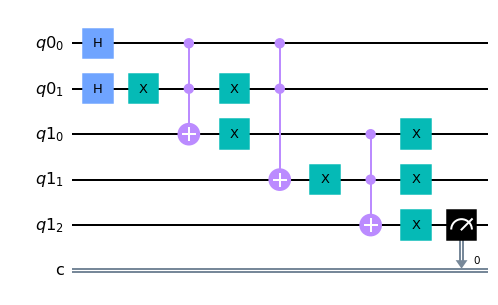

In [3]:
qc.draw(output='mpl')

In [8]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

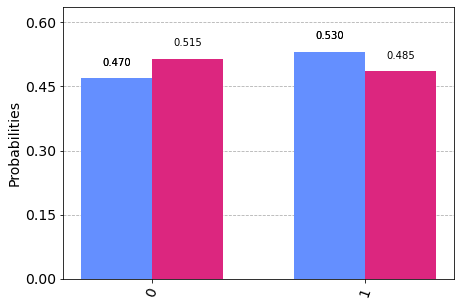

In [11]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
print(qc.qasm())